In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
PGSal = pd.read_csv('..\Player_Data\Cleaned_Player_Data\Cleaned_PG_Sal.csv', index_col = 0)
AdvancedSal = pd.read_csv('..\Player_Data\Cleaned_Player_Data\Cleaned_Advanced_Sal.csv', index_col = 0)

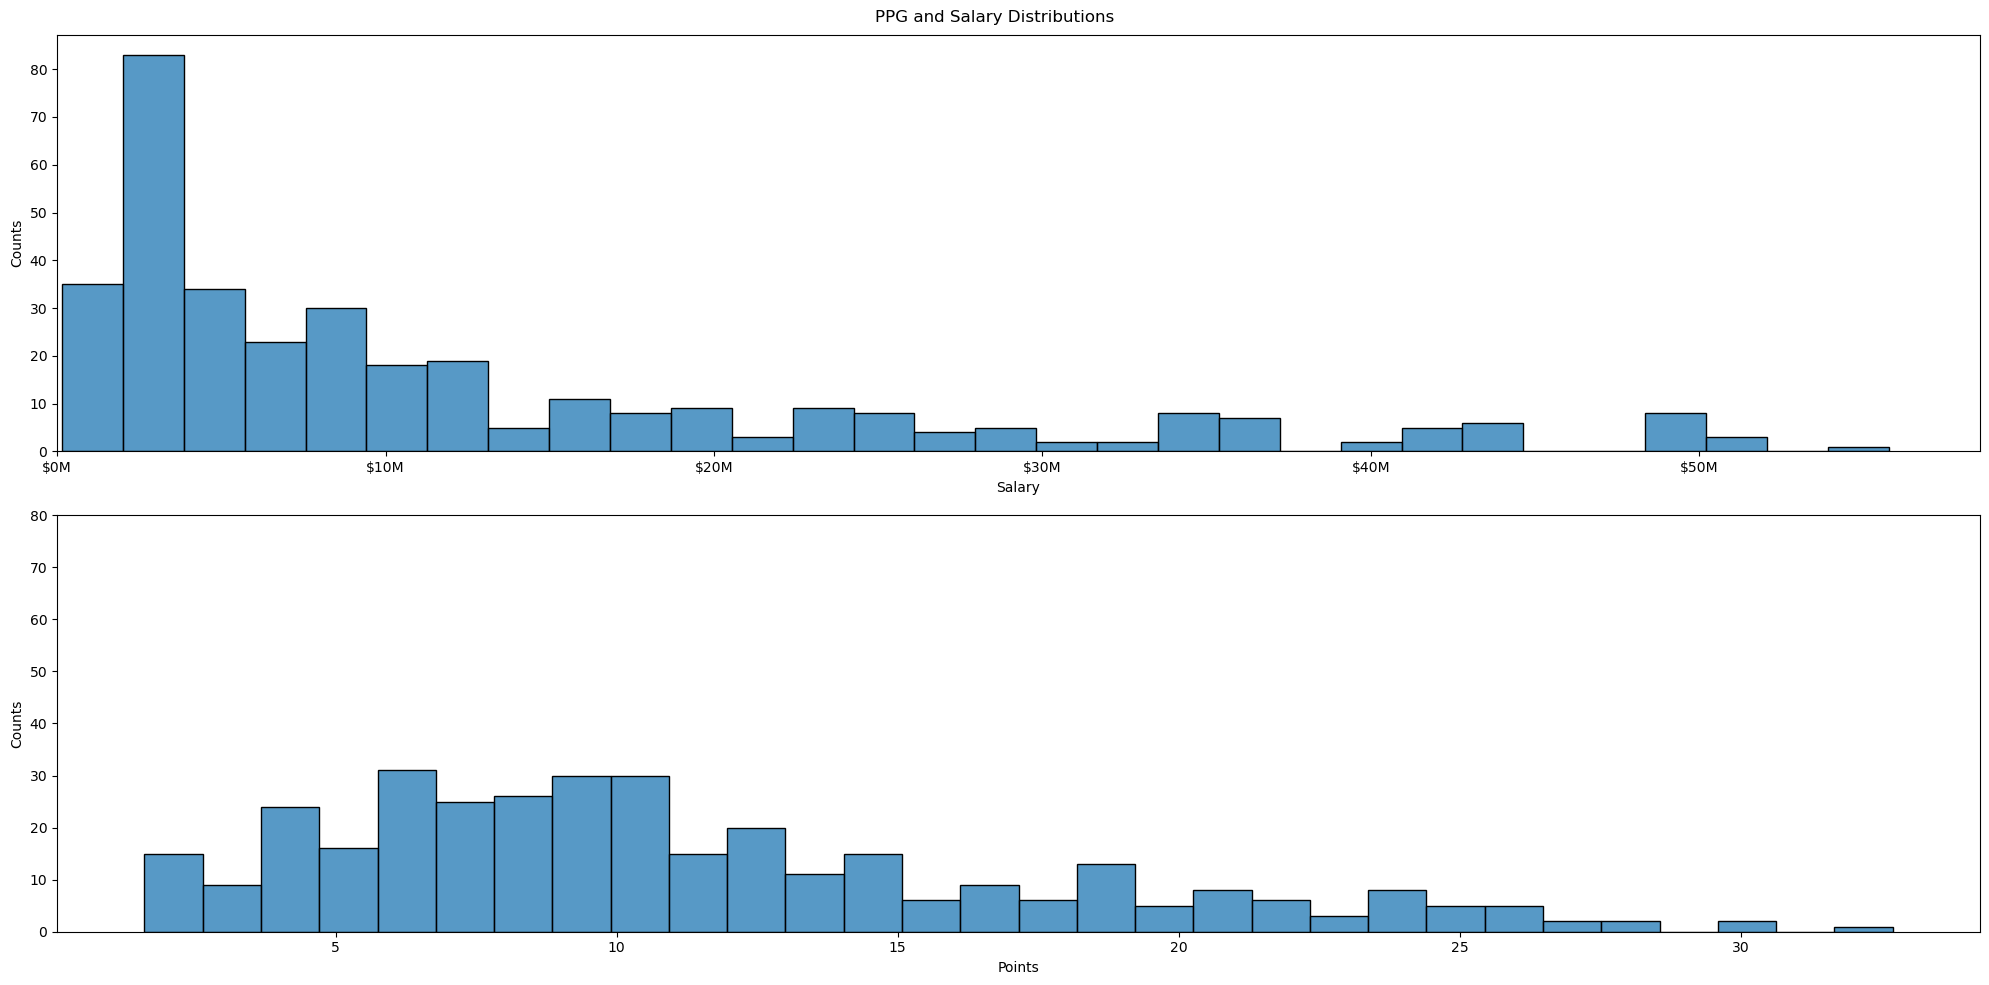

In [230]:

'''
Both the Salary and Points Per Game distributions have similar shapes. They are both skewed to the right and have longer tails. There are more players that are are on 10M dollar 
contracts and smaller than the big contracts. The points per game distribution is a little less skewed as the median is closer to the middle of the distribution than the salary 
distribution. 

'''

fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.histplot(PGSal['YearSalaryM'], bins = 30, ax = ax[0])
sns.histplot(PGSal['PTS'], bins = 30,ax = ax[1])

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}M'))
ax[0].set_xlim(0,)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Salary')


ax[1].set_ylim(0,80)
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Points')

fig.suptitle('PPG and Salary Distributions')



plt.tight_layout()
plt.show()


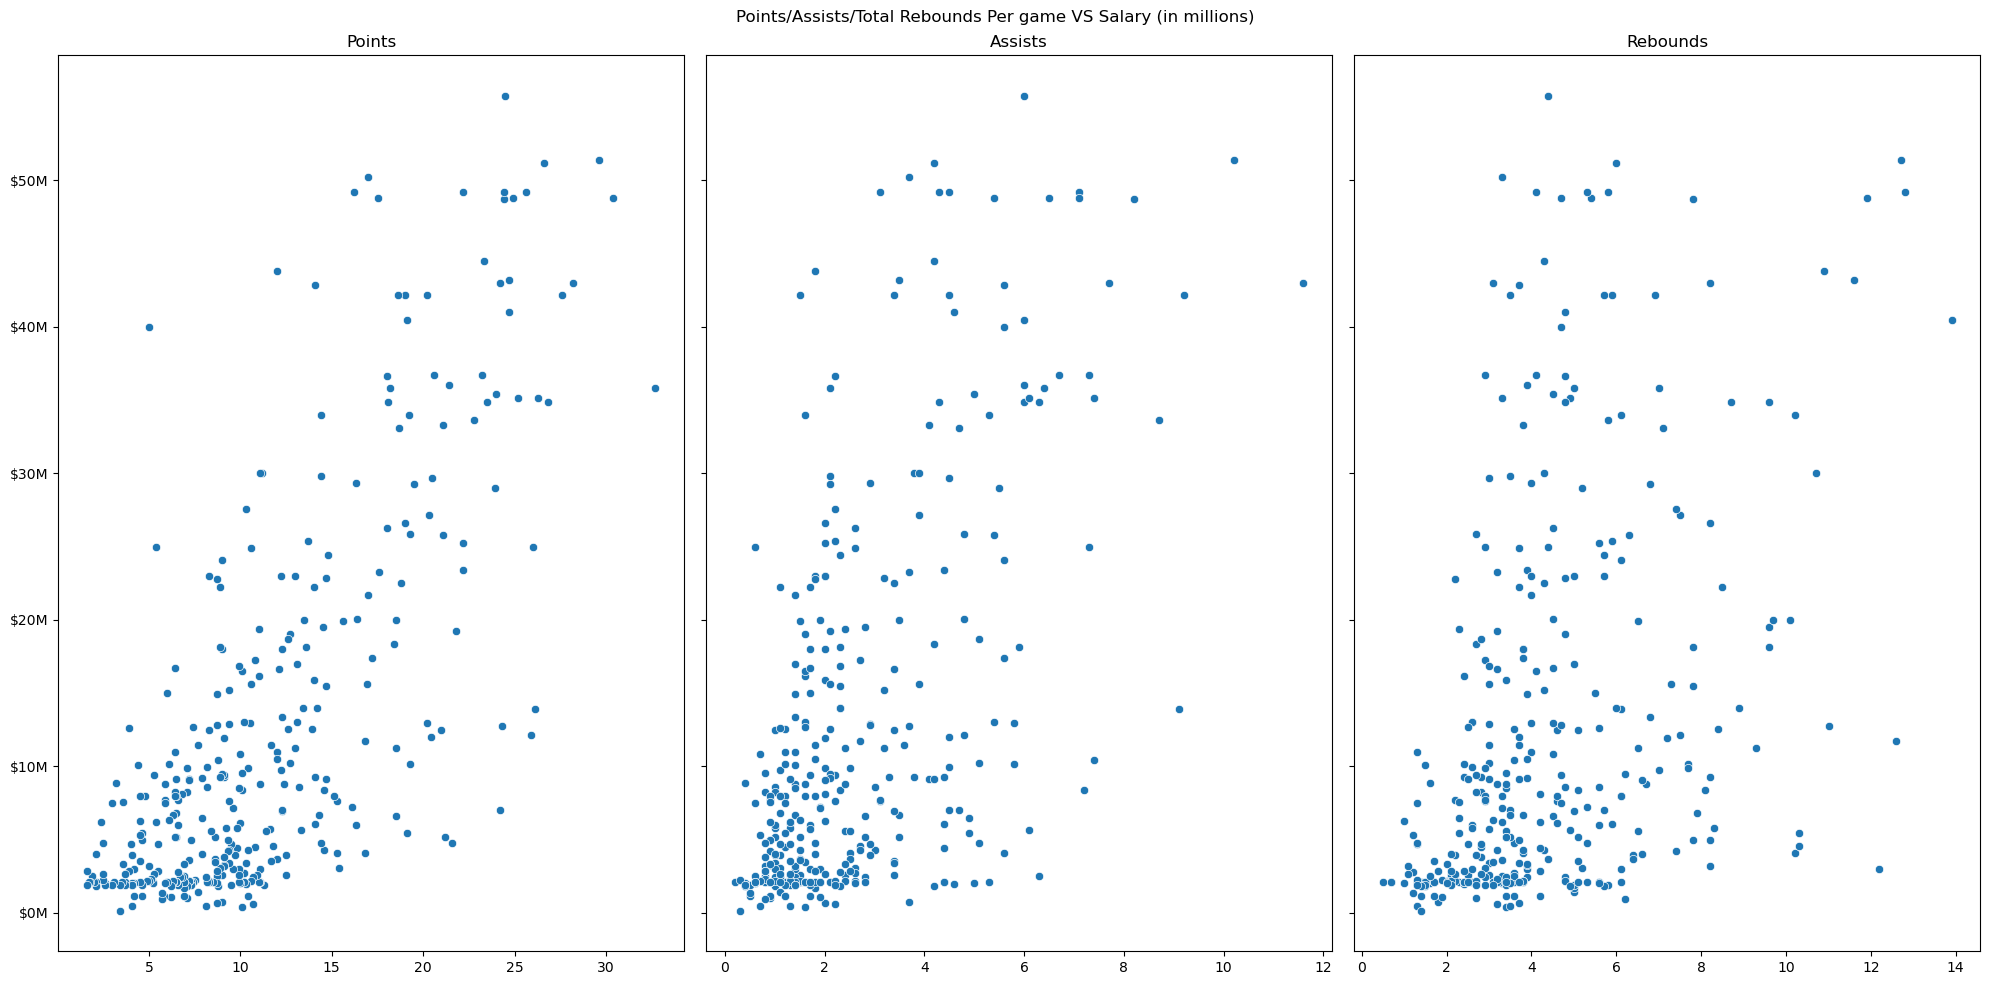

In [224]:
'''
From the graphs of Points per Salary, Assists per Salary, and Total Rebounds per salary, it seems that the first graph has the tightest spread to a positive linear relationship
This shows that for these players, the points per game is a heavily weighted factor for the amount that a team will pay them, a heavier factor than assists or rebounds.
Since the other two have less clear trends and higher residuals (spread). It is common to see players with high averages in rebounds and assists that are not being paid as much
as one may predict based on the overall trends. This shows that points are more influential to determining how much a team will pay a player. This could also be because rebounds
and assists as stats can tell you less about the outcome of the games and the contributions of a player. 
'''

fig, ax = plt.subplots(1,3, figsize = (20,10), sharey=True)

fig.suptitle('Points/Assists/Total Rebounds Per game VS Salary (in millions)')

sns.scatterplot(data = PGSal, x = 'PTS', y = 'YearSalaryM', ax = ax[0])
ax[0].set_title('Points')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y)}M'))

sns.scatterplot(data = PGSal, x = 'AST', y = 'YearSalaryM', ax = ax[1])
ax[1].set_title('Assists')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

sns.scatterplot(data = PGSal, x = 'TRB', y = 'YearSalaryM', ax = ax[2])
ax[2].set_title('Rebounds')
ax[2].set_ylabel('')
ax[2].set_xlabel('')

plt.tight_layout()
plt.show()



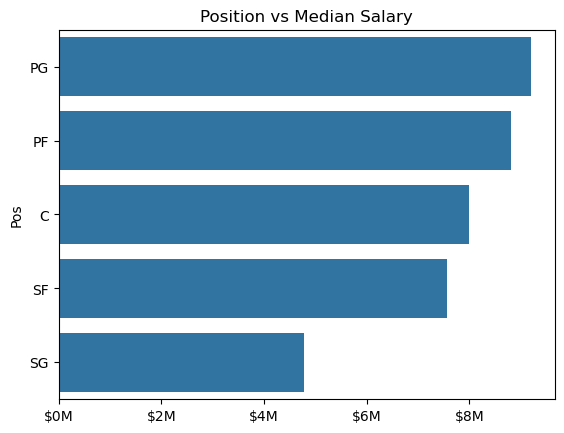

In [216]:
'''
Postional Differences in Median Salary. PG's are paid the most, this could be because most offenses are run through a point gaurd. Additionally SG and SF are paid 
the least out of the positions. This could be because PG's can also play the SG postiion, and some PF could also play the SF position. This could make it so they 
are less valued and therefore teams spend less on those positions. 
'''


sns.barplot(data = PGSal.groupby(by = 'Pos')['YearSalaryM'].median().reset_index().sort_values(by='YearSalaryM', ascending = False), 
            x = 'YearSalaryM',
            y = 'Pos')

plt.title('Position vs Median Salary')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x)}M'))
plt.xlabel('')
plt.show()


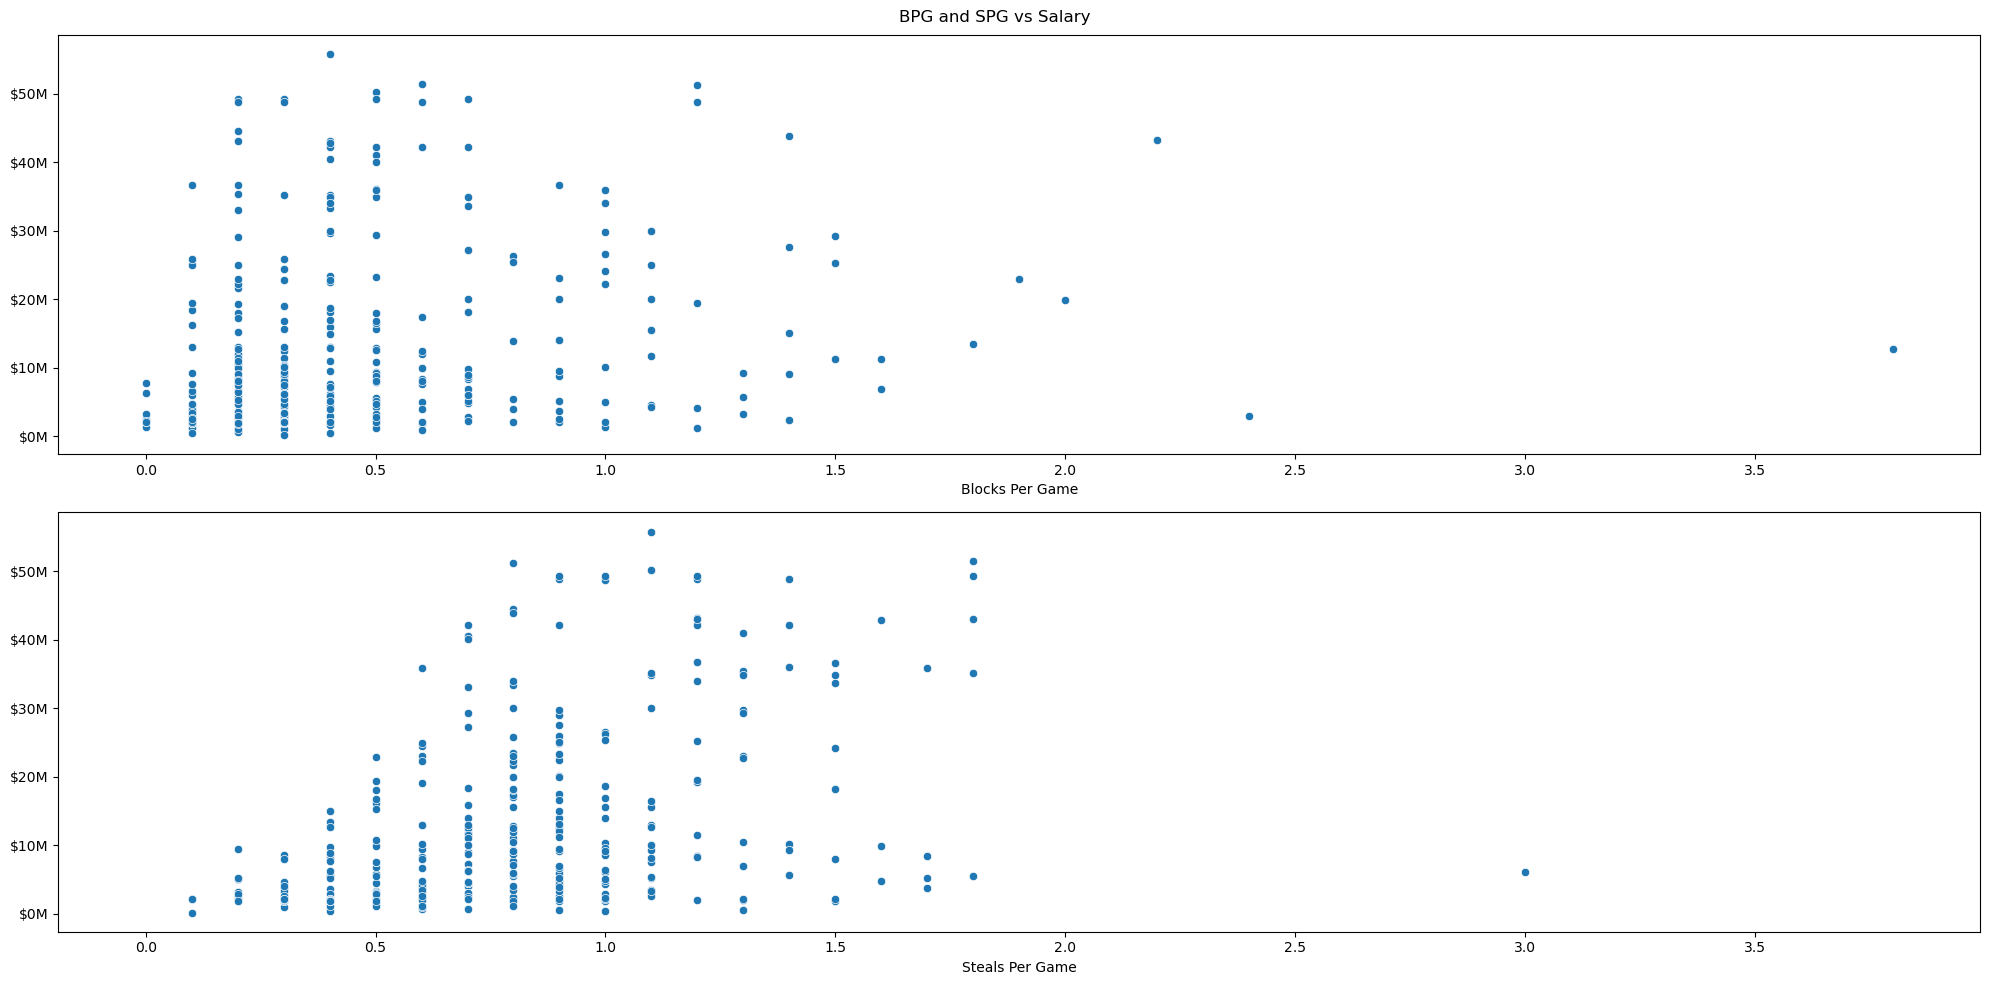

In [217]:
'''
The first graph of Blocks vs Yearly Salary, is less skewed than previous distribution but still has a slight right skew. One reason for a more normal distribution could be 
because of positional variance in salary and contributions. Bigs are more likely to get blocks than gaurds and bigs might tend to get paid less than gaurds. This also
applies to the steal distribution. The steal distribution is somewhat normal with a slight skew to the left. This could reflect the opposite side of the previous reason. 
Gaurds are more likely to get steals an might be getting paid more than bigs. 
'''
fig, ax = plt.subplots(2,1,figsize = (20,10))
sns.scatterplot(data = PGSal, x = 'BLK', y = 'YearSalaryM', ax = ax[0])
sns.scatterplot(data = PGSal, x = 'STL', y = 'YearSalaryM', ax = ax[1])
xlim = ax[0].get_xlim()
ax[1].set_xlim(xlim)
ax[0].set_xlabel('Blocks Per Game')
ax[1].set_xlabel('Steals Per Game')

ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}M'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}M'))

ax[0].set_ylabel('')
ax[1].set_ylabel('')

fig.suptitle('BPG and SPG vs Salary')
plt.tight_layout()
plt.show()







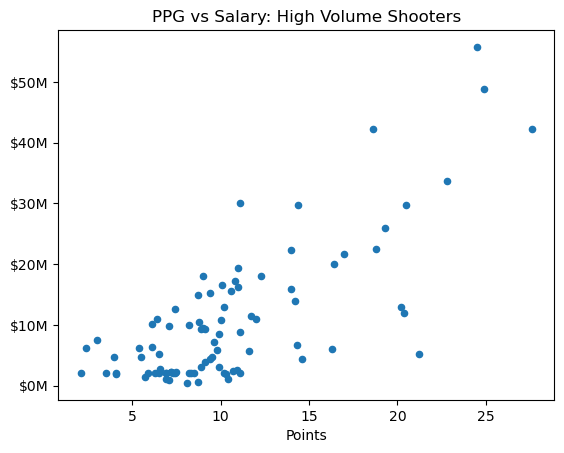

In [218]:
'''
This graph is Points Per Game Per salary for High volume shooters. I found high volume shooters by filtering for players whose 3PA rate is greater than 50%.
Meaning that the majority of their shots were three pointers. Then from those players, I found those who shot over 35 percent from the 3. The Trend of this graph
seems to follow the same as the entire league, showing that specialized shooters do not tend to be favored by teams.
This could also be a result that the 3 point shot has become more common and now players 1-5 are expected to shoot 3 pointers. 
'''

PGSal['3PAr'] = PGSal['3PA']/PGSal['FGA']
PGSal[(PGSal['3PAr'] > 0.5) & (PGSal['3P%'] > 0.35)].sort_values(by = '3P%', ascending= False).plot(kind = 'scatter', x = 'PTS', y = 'YearSalaryM')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}M'))
plt.title('PPG vs Salary: High Volume Shooters')
plt.ylabel('')
plt.xlabel('Points')
plt.show()



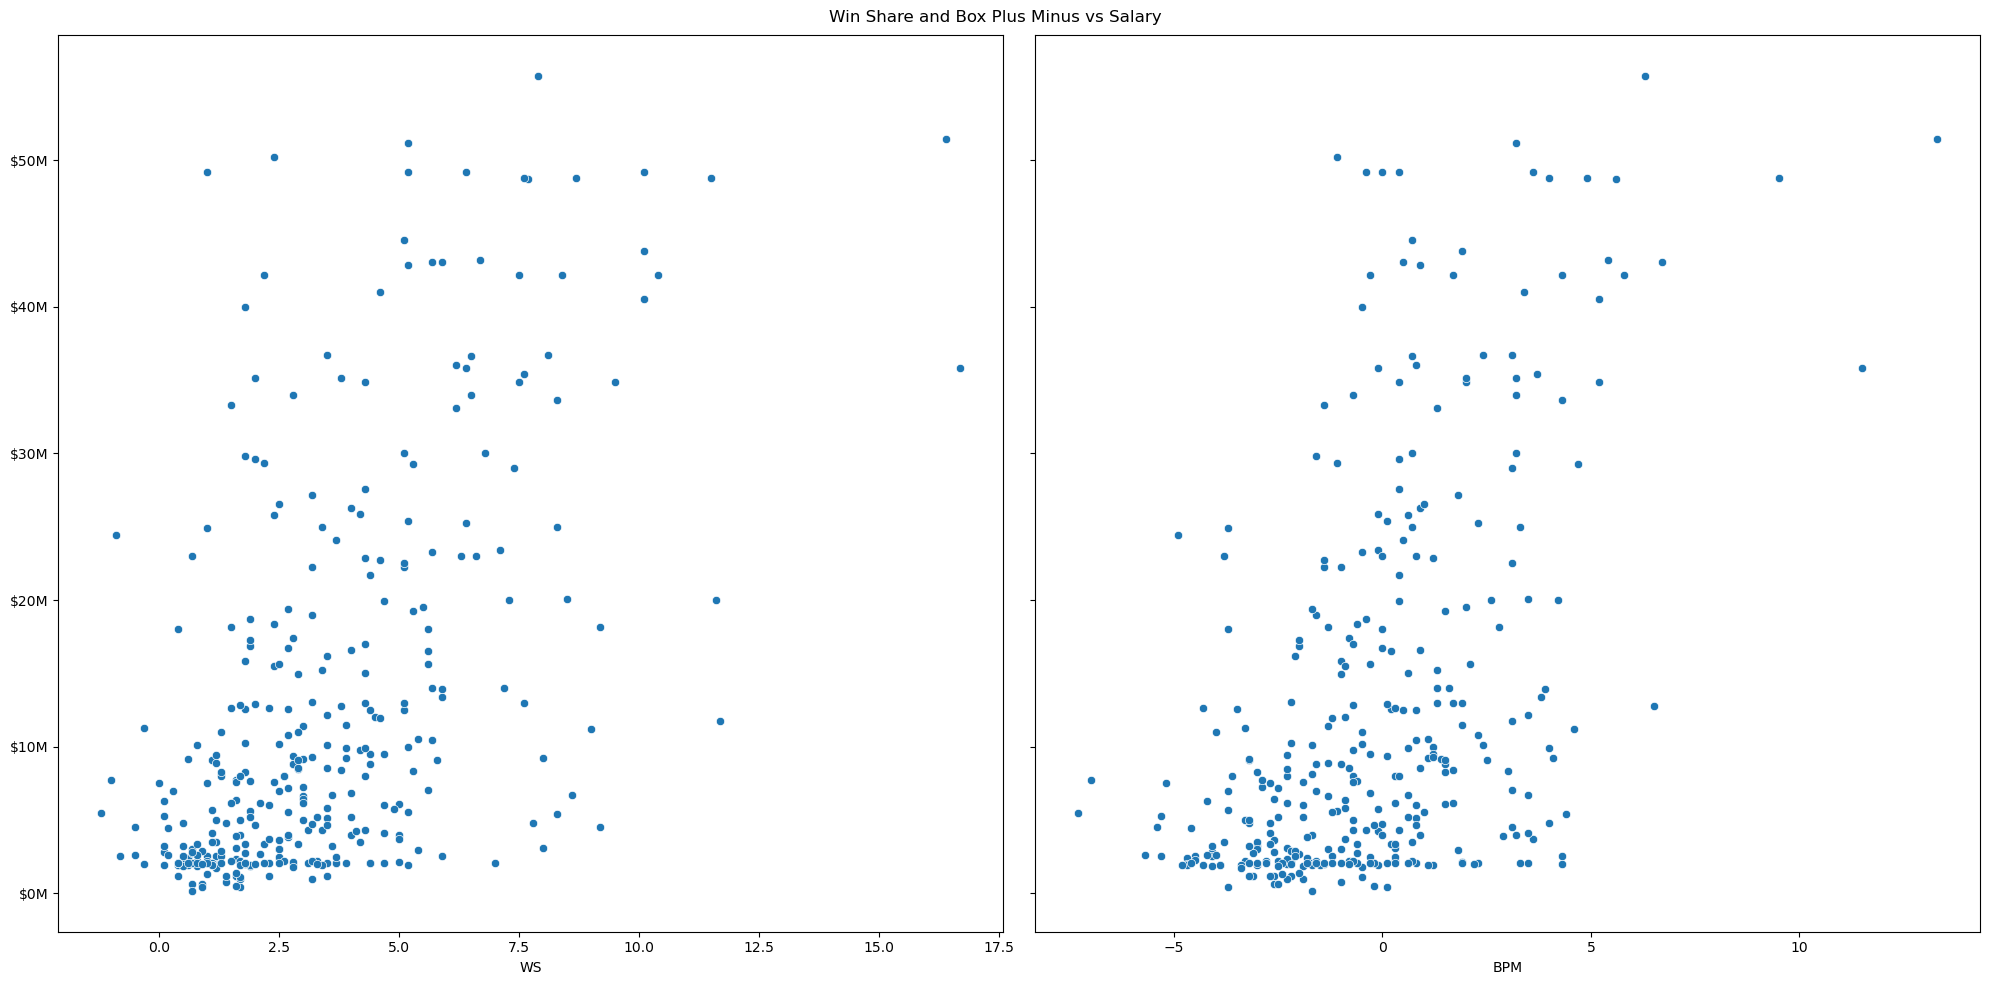

In [219]:
'''
In these graphs I looked at advanced metrics such as Win Shares and Box Plus Minus in relation to salary. The trend was as expected where win shares and box plus minus increased
as the salary increased. I noticed that the BPM graph is shifted more the left, indicating that the median or average BPM might be in the negatives rather than what I initially
expected of being 0. In later parts of my data analysis, I will be looking at which players are outliers for these trends. For example I intend to look at wihch players are getting 
paid significantly for low win shares or low BPM. For example in the BPM graph there are some players making 50M, that have a BPM around 0 or less than 0. 
'''


fig, ax = plt.subplots(1,2, figsize = (20,10), sharey = True)
sns.scatterplot(data = AdvancedSal, x = 'WS', y = 'YearSalaryM', ax = ax[0])
sns.scatterplot(data = AdvancedSal, x = 'BPM',y = 'YearSalaryM', ax = ax[1])
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}M'))
ax[0].set_ylabel('')
fig.suptitle('Win Share and Box Plus Minus vs Salary')
plt.tight_layout()
plt.show()


